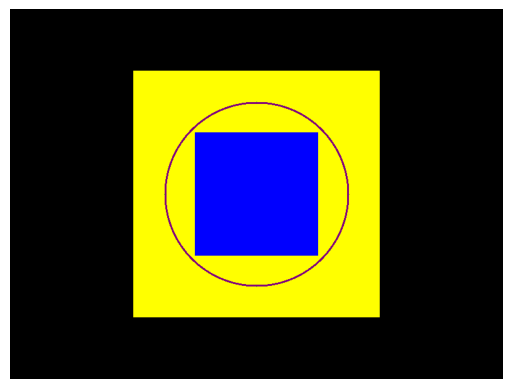

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the image dimensions
WIDTH = 800
HEIGHT = 600

def initialize_abuffer(width, height):
    """
    Initialize the A-buffer with empty lists.
    """
    return [[[] for _ in range(width)] for _ in range(height)]

def update_abuffer(abuffer, x, y, depth, color):
    """
    Update A-buffer with a new fragment.
    """
    if 0 <= x < WIDTH and 0 <= y < HEIGHT:
        if not abuffer[y][x] or depth < abuffer[y][x][0]:
            abuffer[y][x] = [depth, color]
    return abuffer

def composite_abuffer(abuffer):
    """
    Composite final image from A-buffer.
    """
    image = np.zeros((HEIGHT, WIDTH, 3))
    for y in range(HEIGHT):
        for x in range(WIDTH):
            if abuffer[y][x]:
                image[y, x] = abuffer[y][x][1]
    return image

def render_scene():
    """
    Render a simple 2D scene.
    """
    abuffer = initialize_abuffer(WIDTH, HEIGHT)
    
    # Render a blue square with a yellow border
    for y in range(100, 500):
        for x in range(200, 600):
            depth = 0.5
            if (x in range(200, 300) or x in range(500, 600) or
                y in range(100, 200) or y in range(400, 500)):
                color = [1.0, 1.0, 0.0]  # Yellow color for the border
            else:
                color = [0.0, 0.0, 1.0]  # Blue color for the square
            abuffer = update_abuffer(abuffer, x, y, depth, color)
    
    # Render a purple circle with a green border
    center_x = 400
    center_y = 300
    radius = 150
    border_width = 3
    
    for y in range(HEIGHT):
        for x in range(WIDTH):
            distance_to_center = ((x - center_x) ** 2 + (y - center_y) ** 2) ** 0.5
            if (radius - border_width <= distance_to_center <= radius and
                distance_to_center >= radius - border_width):
                depth = 0.4
                if distance_to_center < radius:
                    color = [0.5, 0.0, 0.5]  # Purple color for the circle
                else:
                    color = [0.0, 1.0, 0.0]  # Green color for the border
                abuffer = update_abuffer(abuffer, x, y, depth, color)
    
    # Composite final image
    return composite_abuffer(abuffer)

def main():
    """
    Main function to render the scene and display the final image.
    """
    image = render_scene()
    plt.imshow(image)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()
